In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.linear_model import LinearRegression

In [2]:
base_model = pd.read_csv('Resources/Features_review_size_tiers')

In [3]:
base_model

,Unnamed: 0,App,Rating,Category,Reviews,Size,Installs,Type,Content Rating,Review Group,Size Group
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,ART_AND_DESIGN,159,19000000,10000,Free,Everyone,1-2.5M,13M-28M
1,1,Coloring book moana,3.9,ART_AND_DESIGN,967,14000000,500000,Free,Everyone,1-2.5M,13M-28M
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,ART_AND_DESIGN,87510,8700000,5000000,Free,Everyone,1-2.5M,8.5K-12M
3,3,Sketch - Draw & Paint,4.5,ART_AND_DESIGN,215644,25000000,50000000,Free,Teen,1-2.5M,13M-28M
4,4,Pixel Draw - Number Art Coloring Book,4.3,ART_AND_DESIGN,967,2800000,100000,Free,Everyone,1-2.5M,8.5K-12M
...,...,...,...,...,...,...,...,...,...,...,...
7718,7718,Chemin (fr),4.8,BOOKS_AND_REFERENCE,44,619000,1000,Free,Everyone,1-2.5M,8.5K-12M
7719,7719,FR Calculator,4.0,FAMILY,7,2600000,500,Free,Everyone,1-2.5M,8.5K-12M
7720,7720,Sya9a Maroc - FR,4.5,FAMILY,38,53000000,5000,Free,Everyone,1-2.5M,49M-73M
7721,7721,Fr. Mike Schmitz Audio Teachings,5.0,FAMILY,4,3600000,100,Free,Everyone,1-2.5M,8.5K-12M


In [4]:
base_model["Content Rating"].value_counts()

Everyone           6166
Teen                868
Mature 17+          368
Everyone 10+        318
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

<h3>App Tier Correlations to Rating based on Size, Reviews, and Installs 

<h4>Setting Size, Reviews, Installs Variables for Correlation Plots

In [5]:
#size
sizeA = base_model.loc[base_model["Size Group"]=="8.5K-12M"]
xsizeA= sizeA.Size
xsizeARev = sizeA.Reviews
xsizeAIns = sizeA.Installs
ysizeA = sizeA.Rating

sizeB = base_model.loc[base_model["Size Group"]=="13M-28M"]
xsizeB = sizeB.Size
xsizeBRev = sizeB.Reviews
xsizeBIns = sizeB.Installs
ysizeB = sizeB.Rating

sizeC = base_model.loc[base_model["Size Group"]=="29M-48M"]
xsizeC = sizeC.Size
xsizeCRev = sizeC.Reviews
xsizeCIns = sizeC.Installs
ysizeC = sizeC.Rating

sizeD = base_model.loc[base_model["Size Group"]=="49M-73M"]
xsizeD =sizeD.Size
xsizeDRev = sizeD.Reviews
xsizeDIns = sizeD.Installs
ysizeD = sizeD.Rating

sizeE = base_model.loc[base_model["Size Group"]=="74M+"]
xsizeE = sizeE.Size
xsizeERev = sizeE.Reviews
xsizeEIns = sizeE.Installs
ysizeE = sizeE.Rating



#reviews
reviewA = base_model.loc[base_model["Review Group"]=="1-2.5M"]
xreviewA= reviewA.Size
xreviewARev = reviewA.Reviews
xreviewAIns = reviewA.Installs
yreviewA = reviewA.Rating

reviewB = base_model.loc[base_model["Review Group"]=="3M-6.5M"]
xreviewB = reviewB.Size
xreviewBRev = reviewB.Reviews
xreviewBIns = reviewB.Installs
yreviewB = reviewB.Rating

reviewC = base_model.loc[base_model["Review Group"]=="7.5M-14M"]
xreviewC = reviewC.Size
xreviewCRev = reviewC.Reviews
xreviewCIns = reviewC.Installs
yreviewC = reviewC.Rating

reviewD = base_model.loc[base_model["Review Group"]=="17M-45M"]
xreviewD = reviewD.Size
xreviewDRev = reviewD.Reviews
xreviewDIns = reviewD.Installs
yreviewD = reviewD.Rating



#installs 
installA = base_model.loc[base_model["Installs"]==1]
xinstallA= installA.Size
xinstallARev = installA.Reviews
xinstallAIns = installA.Installs
yinstallA = installA.Rating

installB = base_model.loc[base_model["Installs"]==5]
xinstallB = installB.Size
xinstallBRev = installB.Reviews
xinstallBIns = installB.Installs
yinstallB = installB.Rating

installC = base_model.loc[base_model["Installs"]==10]
xinstallC = installC.Size
xinstallCRev = installC.Reviews
xinstallCIns = installC.Installs
yinstallC = installC.Rating

installD = base_model.loc[base_model["Installs"]==50]
xinstallD = installD.Size
xinstallDRev = installD.Reviews
xinstallDIns = installD.Installs
yinstallD = installD.Rating

installE = base_model.loc[base_model["Installs"]==100]
xinstallE = installE.Size
xinstallERev = installE.Reviews
xinstallEIns = installE.Installs
yinstallE = installE.Rating

installF = base_model.loc[base_model["Installs"]==500]
xinstallF = installF.Size
xinstallFRev = installF.Reviews
xinstallFIns = installF.Installs
yinstallF = installF.Rating

installG = base_model.loc[base_model["Installs"]==1000]
xinstallG = installG.Size
xinstallGRev = installG.Reviews
xinstallGIns = installG.Installs
yinstallG = installG.Rating

installH = base_model.loc[base_model["Installs"]==5000]
xinstallH = installH.Size
xinstallHRev = installH.Reviews
xinstallHIns = installH.Installs
yinstallH = installH.Rating

installI = base_model.loc[base_model["Installs"]==10000]
xinstallI= installI.Size
xinstallIRev = installI.Reviews
xinstallIIns = installI.Installs
yinstallI = installI.Rating

installJ = base_model.loc[base_model["Installs"]==50000]
xinstallJ = installJ.Size
xinstallJRev = installJ.Reviews
xinstallJIns = installJ.Installs
yinstallJ = installJ.Rating

installK = base_model.loc[base_model["Installs"]==100000]
xinstallK = installK.Size
xinstallKRev = installK.Reviews
xinstallKIns = installK.Installs
yinstallK = installK.Rating

installL = base_model.loc[base_model["Installs"]==500000]
xinstallL = installL.Size
xinstallLRev = installL.Reviews
xinstallLIns = installL.Installs
yinstallL = installL.Rating

installM = base_model.loc[base_model["Installs"]==1000000]
xinstallM = installM.Size
xinstallMRev = installM.Reviews
xinstallMIns = installM.Installs
yinstallM = installM.Rating

installN = base_model.loc[base_model["Installs"]==5000000]
xinstallN = installN.Size
xinstallNRev = installN.Reviews
xinstallNIns = installN.Installs
yinstallN = installN.Rating

installO = base_model.loc[base_model["Installs"]==10000000]
xinstallO = installO.Size
xinstallORev = installO.Reviews
xinstallOIns = installO.Installs
yinstallO = installO.Rating

installP = base_model.loc[base_model["Installs"]==50000000]
xinstallP = installP.Size
xinstallPRev = installP.Reviews
xinstallPIns = installP.Installs
yinstallP = installP.Rating

installQ = base_model.loc[base_model["Installs"]==100000000]
xinstallQ= installQ.Size
xinstallQRev = installQ.Reviews
xinstallQIns = installQ.Installs
yinstallQ = installQ.Rating

installR = base_model.loc[base_model["Installs"]==500000000]
xinstallR = installR.Size
xinstallRRev = installR.Reviews
xinstallRIns = installR.Installs
yinstallR = installR.Rating

installS = base_model.loc[base_model["Installs"]==1000000000]
xinstallS = installS.Size
xinstallSRev = installS.Reviews
xinstallSIns = installS.Installs
yinstallS = installS.Rating


<h3>Size Tiers (5)

<h4>App Size v Rating by Size Tiers (5)

The correlation coefficient is 0.07
The linear regression line equation is y = 0.0x + 4.07
The correlation coefficient is 0.01
The linear regression line equation is y = 0.0x + 4.16
The correlation coefficient is 0.02
The linear regression line equation is y = 0.0x + 4.08
The correlation coefficient is -0.01
The linear regression line equation is y = -0.0x + 4.29
The correlation coefficient is 0.0
The linear regression line equation is y = 0.0x + 4.3


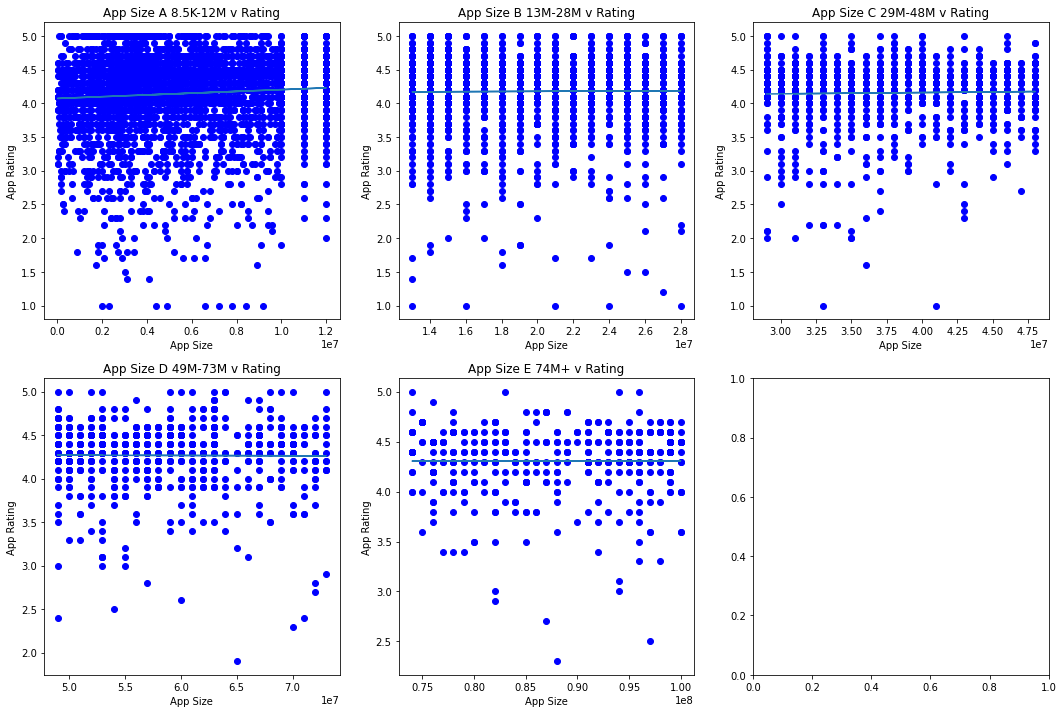

In [6]:
f,ax=plt.subplots(2,3,figsize=(18,12))

ax[0,0].scatter(xsizeA,ysizeA , color = 'blue')
ax[0,0].set_title("App Size A 8.5K-12M v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationSizeA = st.pearsonr(xsizeA,ysizeA)
m, b = np.polyfit(xsizeA, ysizeA, 1)
ax[0,0].plot(xsizeA, m*xsizeA + b)
line_eq_SizeA  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeA[0],2)))
print("The linear regression line equation is " + line_eq_SizeA)

ax[0,1].scatter(xsizeB,ysizeB, color = 'blue')
ax[0,1].set_title("App Size B 13M-28M v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationSizeB = st.pearsonr(xsizeB,ysizeB)
m, b = np.polyfit(xsizeB, ysizeB, 1)
ax[0,1].plot(xsizeB, m*xsizeB + b)
line_eq_SizeB = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeB[0],2)))
print("The linear regression line equation is " + line_eq_SizeB)

ax[0,2].scatter(xsizeC,ysizeC, color = 'blue')
ax[0,2].set_title("App Size C 29M-48M v Rating")
ax[0,2].set_xlabel("App Size")
ax[0,2].set_ylabel("App Rating")
correlationSizeC = st.pearsonr(xsizeC,ysizeC)
m, b = np.polyfit(xsizeC,ysizeC, 1)
ax[0,2].plot(xsizeC, m*xsizeC + b)
line_eq_SizeC = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeC[0],2)))
print("The linear regression line equation is " + line_eq_SizeC)


ax[1,0].scatter(xsizeD,ysizeD, color = 'blue')
ax[1,0].set_title("App Size D 49M-73M v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationSizeD = st.pearsonr(xsizeD,ysizeD)
m, b = np.polyfit(xsizeD,ysizeD, 1)
ax[1,0].plot(xsizeD, m*xsizeD + b)
line_eq_SizeD = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeD[0],2)))
print("The linear regression line equation is " + line_eq_SizeD)

ax[1,1].scatter(xsizeE,ysizeE, color = 'blue')
ax[1,1].set_title("App Size E 74M+ v Rating")
ax[1,1].set_xlabel("App Size")
ax[1,1].set_ylabel("App Rating")
correlationSizeE = st.pearsonr(xsizeE,ysizeE)
m, b = np.polyfit(xsizeE,ysizeE, 1)
ax[1,1].plot(xsizeE, m*xsizeE + b)
line_eq_SizeE = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeE[0],2)))
print("The linear regression line equation is " + line_eq_SizeE)

<h4>App Reviews v Ratings by Size Tiers (5)

The correlation coefficient is 0.07
The linear regression line equation is y = 0.0x + 4.14
The correlation coefficient is 0.09
The linear regression line equation is y = 0.0x + 4.17
The correlation coefficient is 0.1
The linear regression line equation is y = 0.0x + 4.15
The correlation coefficient is 0.14
The linear regression line equation is y = 0.0x + 4.25
The correlation coefficient is 0.18
The linear regression line equation is y = 0.0x + 4.29


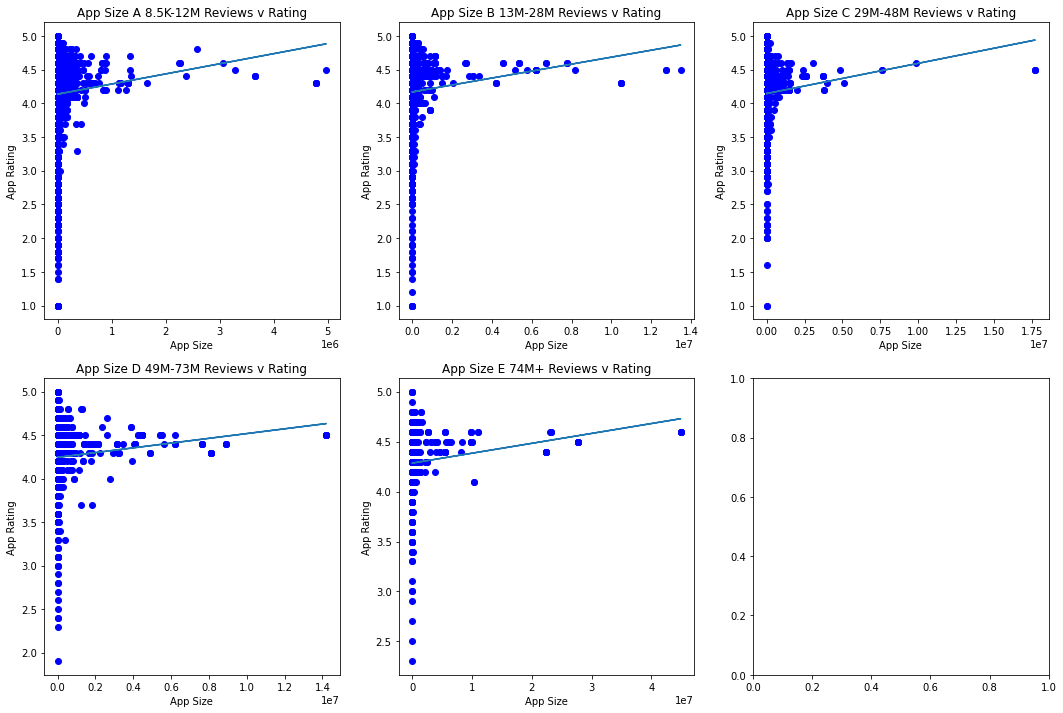

In [7]:
f,ax=plt.subplots(2,3,figsize=(18,12))

ax[0,0].scatter(xsizeARev,ysizeA , color = 'blue')
ax[0,0].set_title("App Size A 8.5K-12M Reviews v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationSizeARev = st.pearsonr(xsizeARev,ysizeA)
m, b = np.polyfit(xsizeARev, ysizeA, 1)
ax[0,0].plot(xsizeARev, m*xsizeARev + b)
line_eq_SizeARev  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeARev[0],2)))
print("The linear regression line equation is " + line_eq_SizeARev)

ax[0,1].scatter(xsizeBRev,ysizeB, color = 'blue')
ax[0,1].set_title("App Size B 13M-28M Reviews v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationSizeBRev = st.pearsonr(xsizeBRev,ysizeB)
m, b = np.polyfit(xsizeBRev, ysizeB, 1)
ax[0,1].plot(xsizeBRev, m*xsizeBRev + b)
line_eq_SizeBRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeBRev[0],2)))
print("The linear regression line equation is " + line_eq_SizeBRev)

ax[0,2].scatter(xsizeCRev,ysizeC, color = 'blue')
ax[0,2].set_title("App Size C 29M-48M Reviews v Rating")
ax[0,2].set_xlabel("App Size")
ax[0,2].set_ylabel("App Rating")
correlationSizeCRev = st.pearsonr(xsizeCRev,ysizeC)
m, b = np.polyfit(xsizeCRev,ysizeC, 1)
ax[0,2].plot(xsizeCRev, m*xsizeCRev + b)
line_eq_SizeCRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeCRev[0],2)))
print("The linear regression line equation is " + line_eq_SizeCRev)


ax[1,0].scatter(xsizeDRev,ysizeD, color = 'blue')
ax[1,0].set_title("App Size D 49M-73M Reviews v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationSizeDRev = st.pearsonr(xsizeDRev,ysizeD)
m, b = np.polyfit(xsizeDRev,ysizeD, 1)
ax[1,0].plot(xsizeDRev, m*xsizeDRev + b)
line_eq_SizeDRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeDRev[0],2)))
print("The linear regression line equation is " + line_eq_SizeDRev)

ax[1,1].scatter(xsizeERev,ysizeE, color = 'blue')
ax[1,1].set_title("App Size E 74M+ Reviews v Rating")
ax[1,1].set_xlabel("App Size")
ax[1,1].set_ylabel("App Rating")
correlationSizeERev = st.pearsonr(xsizeERev,ysizeE)
m, b = np.polyfit(xsizeERev,ysizeE, 1)
ax[1,1].plot(xsizeERev, m*xsizeERev + b)
line_eq_SizeERev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeERev[0],2)))
print("The linear regression line equation is " + line_eq_SizeERev)

<h4>App Installs v Ratings by Size Tiers (5)

The correlation coefficient is 0.03
The linear regression line equation is y = 0.0x + 4.14
The correlation coefficient is 0.01
The linear regression line equation is y = 0.0x + 4.18
The correlation coefficient is 0.1
The linear regression line equation is y = 0.0x + 4.14
The correlation coefficient is 0.08
The linear regression line equation is y = 0.0x + 4.26
The correlation coefficient is 0.12
The linear regression line equation is y = 0.0x + 4.29


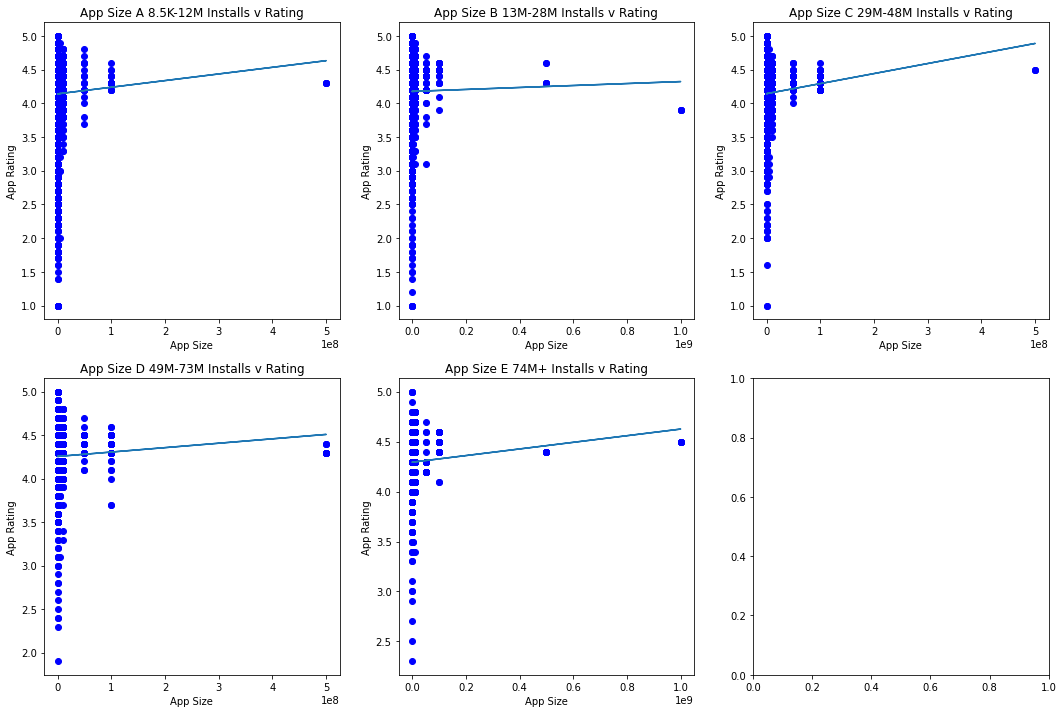

In [8]:
f,ax=plt.subplots(2,3,figsize=(18,12))

ax[0,0].scatter(xsizeAIns,ysizeA , color = 'blue')
ax[0,0].set_title("App Size A 8.5K-12M Installs v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationSizeAIns = st.pearsonr(xsizeAIns,ysizeA)
m, b = np.polyfit(xsizeAIns, ysizeA, 1)
ax[0,0].plot(xsizeAIns, m*xsizeAIns + b)
line_eq_SizeAIns  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeAIns[0],2)))
print("The linear regression line equation is " + line_eq_SizeAIns)

ax[0,1].scatter(xsizeBIns,ysizeB, color = 'blue')
ax[0,1].set_title("App Size B 13M-28M Installs v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationSizeBIns = st.pearsonr(xsizeBIns,ysizeB)
m, b = np.polyfit(xsizeBIns, ysizeB, 1)
ax[0,1].plot(xsizeBIns, m*xsizeBIns + b)
line_eq_SizeBIns = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeBIns[0],2)))
print("The linear regression line equation is " + line_eq_SizeBIns)

ax[0,2].scatter(xsizeCIns,ysizeC, color = 'blue')
ax[0,2].set_title("App Size C 29M-48M Installs v Rating")
ax[0,2].set_xlabel("App Size")
ax[0,2].set_ylabel("App Rating")
correlationSizeCIns = st.pearsonr(xsizeCIns,ysizeC)
m, b = np.polyfit(xsizeCIns,ysizeC, 1)
ax[0,2].plot(xsizeCIns, m*xsizeCIns + b)
line_eq_SizeCIns = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeCIns[0],2)))
print("The linear regression line equation is " + line_eq_SizeCIns)


ax[1,0].scatter(xsizeDIns,ysizeD, color = 'blue')
ax[1,0].set_title("App Size D 49M-73M Installs v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationSizeDIns = st.pearsonr(xsizeDIns,ysizeD)
m, b = np.polyfit(xsizeDIns,ysizeD, 1)
ax[1,0].plot(xsizeDIns, m*xsizeDIns + b)
line_eq_SizeDIns = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeDIns[0],2)))
print("The linear regression line equation is " + line_eq_SizeDIns)

ax[1,1].scatter(xsizeEIns,ysizeE, color = 'blue')
ax[1,1].set_title("App Size E 74M+ Installs v Rating")
ax[1,1].set_xlabel("App Size")
ax[1,1].set_ylabel("App Rating")
correlationSizeEIns = st.pearsonr(xsizeEIns,ysizeE)
m, b = np.polyfit(xsizeEIns,ysizeE, 1)
ax[1,1].plot(xsizeEIns, m*xsizeEIns + b)
line_eq_SizeEIns = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationSizeEIns[0],2)))
print("The linear regression line equation is " + line_eq_SizeEIns)

<h3>Review Tiers (4)

<h4>App Size v Ratings by Review Tiers (4)

The correlation coefficient is 0.07
The linear regression line equation is y = 0.0x + 4.13
The correlation coefficient is -0.07
The linear regression line equation is y = -0.0x + 4.46
The correlation coefficient is -0.04
The linear regression line equation is y = -0.0x + 4.45
The correlation coefficient is 0.55
The linear regression line equation is y = 0.0x + 4.31


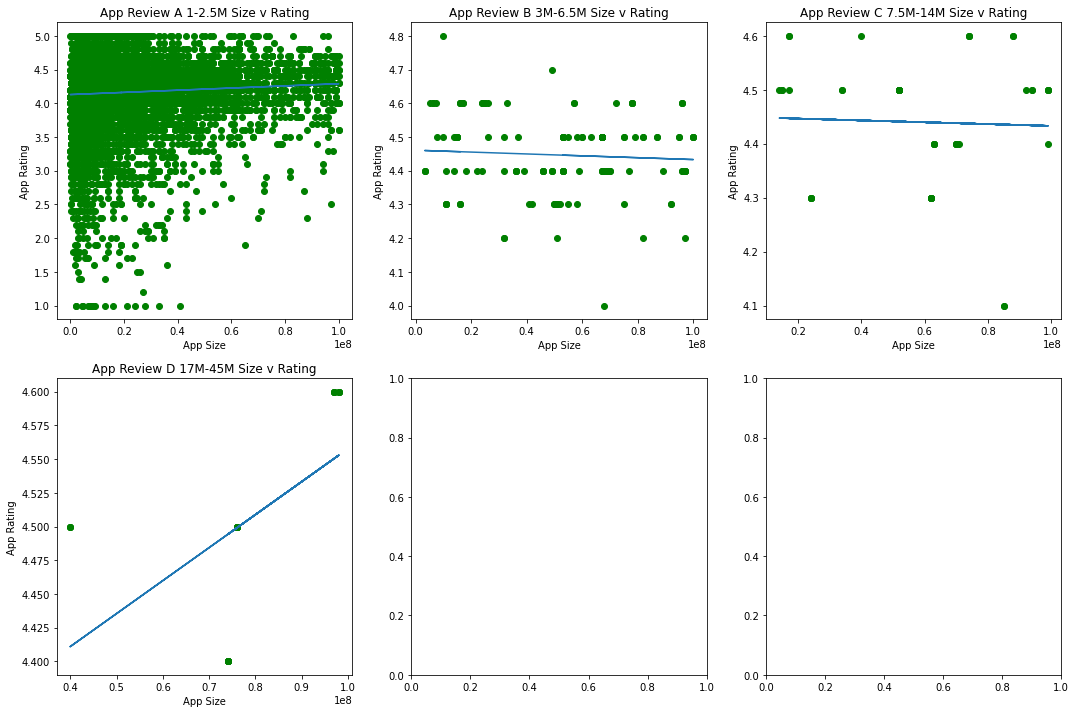

In [9]:
f,ax=plt.subplots(2,3,figsize=(18,12))

ax[0,0].scatter(xreviewA,yreviewA , color = 'green')
ax[0,0].set_title("App Review A 1-2.5M Size v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationReviewA = st.pearsonr(xreviewA,yreviewA)
m, b = np.polyfit(xreviewA, yreviewA, 1)
ax[0,0].plot(xreviewA, m*xreviewA + b)
line_eq_ReviewA  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewA[0],2)))
print("The linear regression line equation is " + line_eq_ReviewA)

ax[0,1].scatter(xreviewB,yreviewB, color = 'green')
ax[0,1].set_title("App Review B 3M-6.5M Size v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationReviewB = st.pearsonr(xreviewB,yreviewB)
m, b = np.polyfit(xreviewB, yreviewB, 1)
ax[0,1].plot(xreviewB, m*xreviewB + b)
line_eq_ReviewB = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewB[0],2)))
print("The linear regression line equation is " + line_eq_ReviewB)

ax[0,2].scatter(xreviewC,yreviewC, color = 'green')
ax[0,2].set_title("App Review C 7.5M-14M Size v Rating")
ax[0,2].set_xlabel("App Size")
ax[0,2].set_ylabel("App Rating")
correlationReviewC = st.pearsonr(xreviewC,yreviewC)
m, b = np.polyfit(xreviewC,yreviewC, 1)
ax[0,2].plot(xreviewC, m*xreviewC + b)
line_eq_ReviewC = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewC[0],2)))
print("The linear regression line equation is " + line_eq_ReviewC)


ax[1,0].scatter(xreviewD,yreviewD, color = 'green')
ax[1,0].set_title("App Review D 17M-45M Size v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationReviewD = st.pearsonr(xreviewD,yreviewD)
m, b = np.polyfit(xreviewD,yreviewD, 1)
ax[1,0].plot(xreviewD, m*xreviewD + b)
line_eq_ReviewD = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewD[0],2)))
print("The linear regression line equation is " + line_eq_ReviewD)

<h4>App Reviews v Ratings by Review Tiers (4)

The correlation coefficient is 0.07
The linear regression line equation is y = 0.0x + 4.14
The correlation coefficient is 0.12
The linear regression line equation is y = 0.0x + 4.4
The correlation coefficient is 0.23
The linear regression line equation is y = 0.0x + 4.31
The correlation coefficient is 0.54
The linear regression line equation is y = 0.0x + 4.37


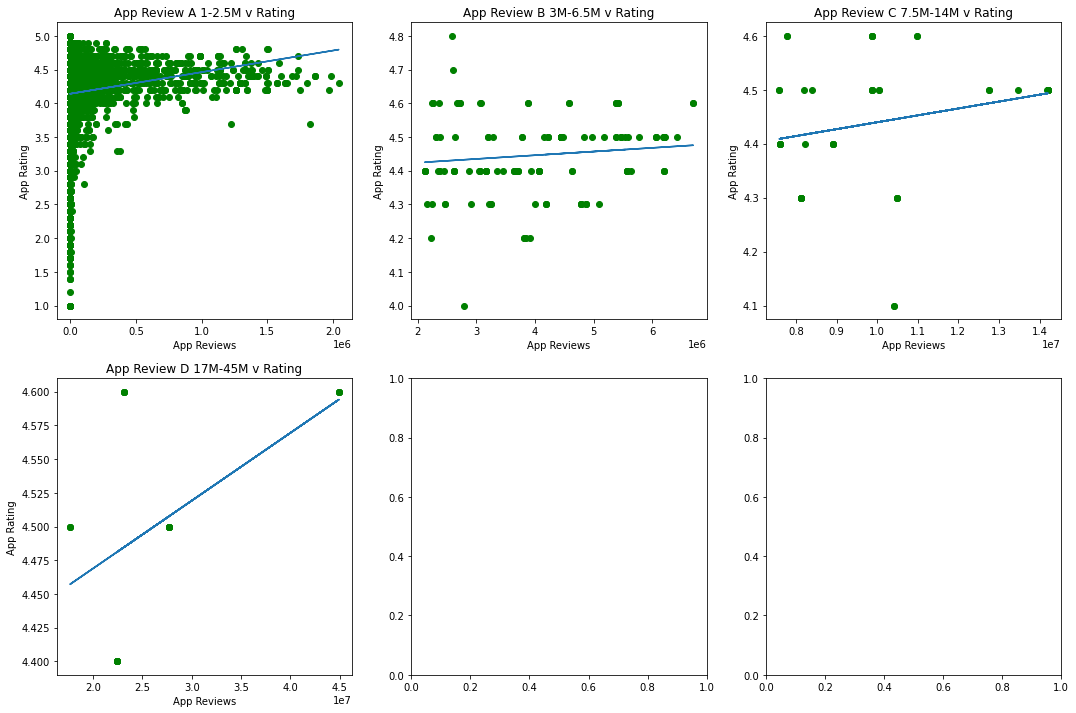

In [10]:
f,ax=plt.subplots(2,3,figsize=(18,12))

ax[0,0].scatter(xreviewARev,yreviewA , color = 'green')
ax[0,0].set_title("App Review A 1-2.5M v Rating")
ax[0,0].set_xlabel("App Reviews")
ax[0,0].set_ylabel("App Rating")
correlationReviewARev = st.pearsonr(xreviewA,yreviewA)
m, b = np.polyfit(xreviewARev, yreviewA, 1)
ax[0,0].plot(xreviewARev, m*xreviewARev + b)
line_eq_ReviewARev  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewARev[0],2)))
print("The linear regression line equation is " + line_eq_ReviewARev)

ax[0,1].scatter(xreviewBRev,yreviewB, color = 'green')
ax[0,1].set_title("App Review B 3M-6.5M v Rating")
ax[0,1].set_xlabel("App Reviews")
ax[0,1].set_ylabel("App Rating")
correlationReviewBRev = st.pearsonr(xreviewBRev,yreviewB)
m, b = np.polyfit(xreviewBRev, yreviewB, 1)
ax[0,1].plot(xreviewBRev, m*xreviewBRev + b)
line_eq_ReviewBRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewBRev[0],2)))
print("The linear regression line equation is " + line_eq_ReviewBRev)

ax[0,2].scatter(xreviewCRev,yreviewC, color = 'green')
ax[0,2].set_title("App Review C 7.5M-14M v Rating")
ax[0,2].set_xlabel("App Reviews")
ax[0,2].set_ylabel("App Rating")
correlationReviewCRev = st.pearsonr(xreviewCRev,yreviewC)
m, b = np.polyfit(xreviewCRev,yreviewC, 1)
ax[0,2].plot(xreviewCRev, m*xreviewCRev + b)
line_eq_ReviewCRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewCRev[0],2)))
print("The linear regression line equation is " + line_eq_ReviewCRev)


ax[1,0].scatter(xreviewDRev,yreviewD, color = 'green')
ax[1,0].set_title("App Review D 17M-45M v Rating")
ax[1,0].set_xlabel("App Reviews")
ax[1,0].set_ylabel("App Rating")
correlationReviewDRev = st.pearsonr(xreviewDRev,yreviewD)
m, b = np.polyfit(xreviewDRev,yreviewD, 1)
ax[1,0].plot(xreviewDRev, m*xreviewDRev + b)
line_eq_ReviewDRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationReviewDRev[0],2)))
print("The linear regression line equation is " + line_eq_ReviewDRev)

<h4>App Installs v Ratings by Review Tiers (4)

<h3>Install Tiers (19)

<h4>App Size v Ratings by Install Tiers (19)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


The correlation coefficient is nan
The linear regression line equation is y = 0.0x + 5.0
The correlation coefficient is -0.79
The linear regression line equation is y = -0.0x + 5.43
The correlation coefficient is 0.1
The linear regression line equation is y = 0.0x + 4.58
The correlation coefficient is -0.02
The linear regression line equation is y = -0.0x + 4.44
The correlation coefficient is 0.03
The linear regression line equation is y = 0.0x + 4.35
The correlation coefficient is -0.08
The linear regression line equation is y = -0.0x + 4.23
The correlation coefficient is 0.01
The linear regression line equation is y = 0.0x + 4.06
The correlation coefficient is -0.01
The linear regression line equation is y = -0.0x + 4.03
The correlation coefficient is -0.01
The linear regression line equation is y = -0.0x + 4.04
The correlation coefficient is 0.04
The linear regression line equation is y = 0.0x + 4.03
The correlation coefficient is 0.06
The linear regression line equation is y = 0.0x

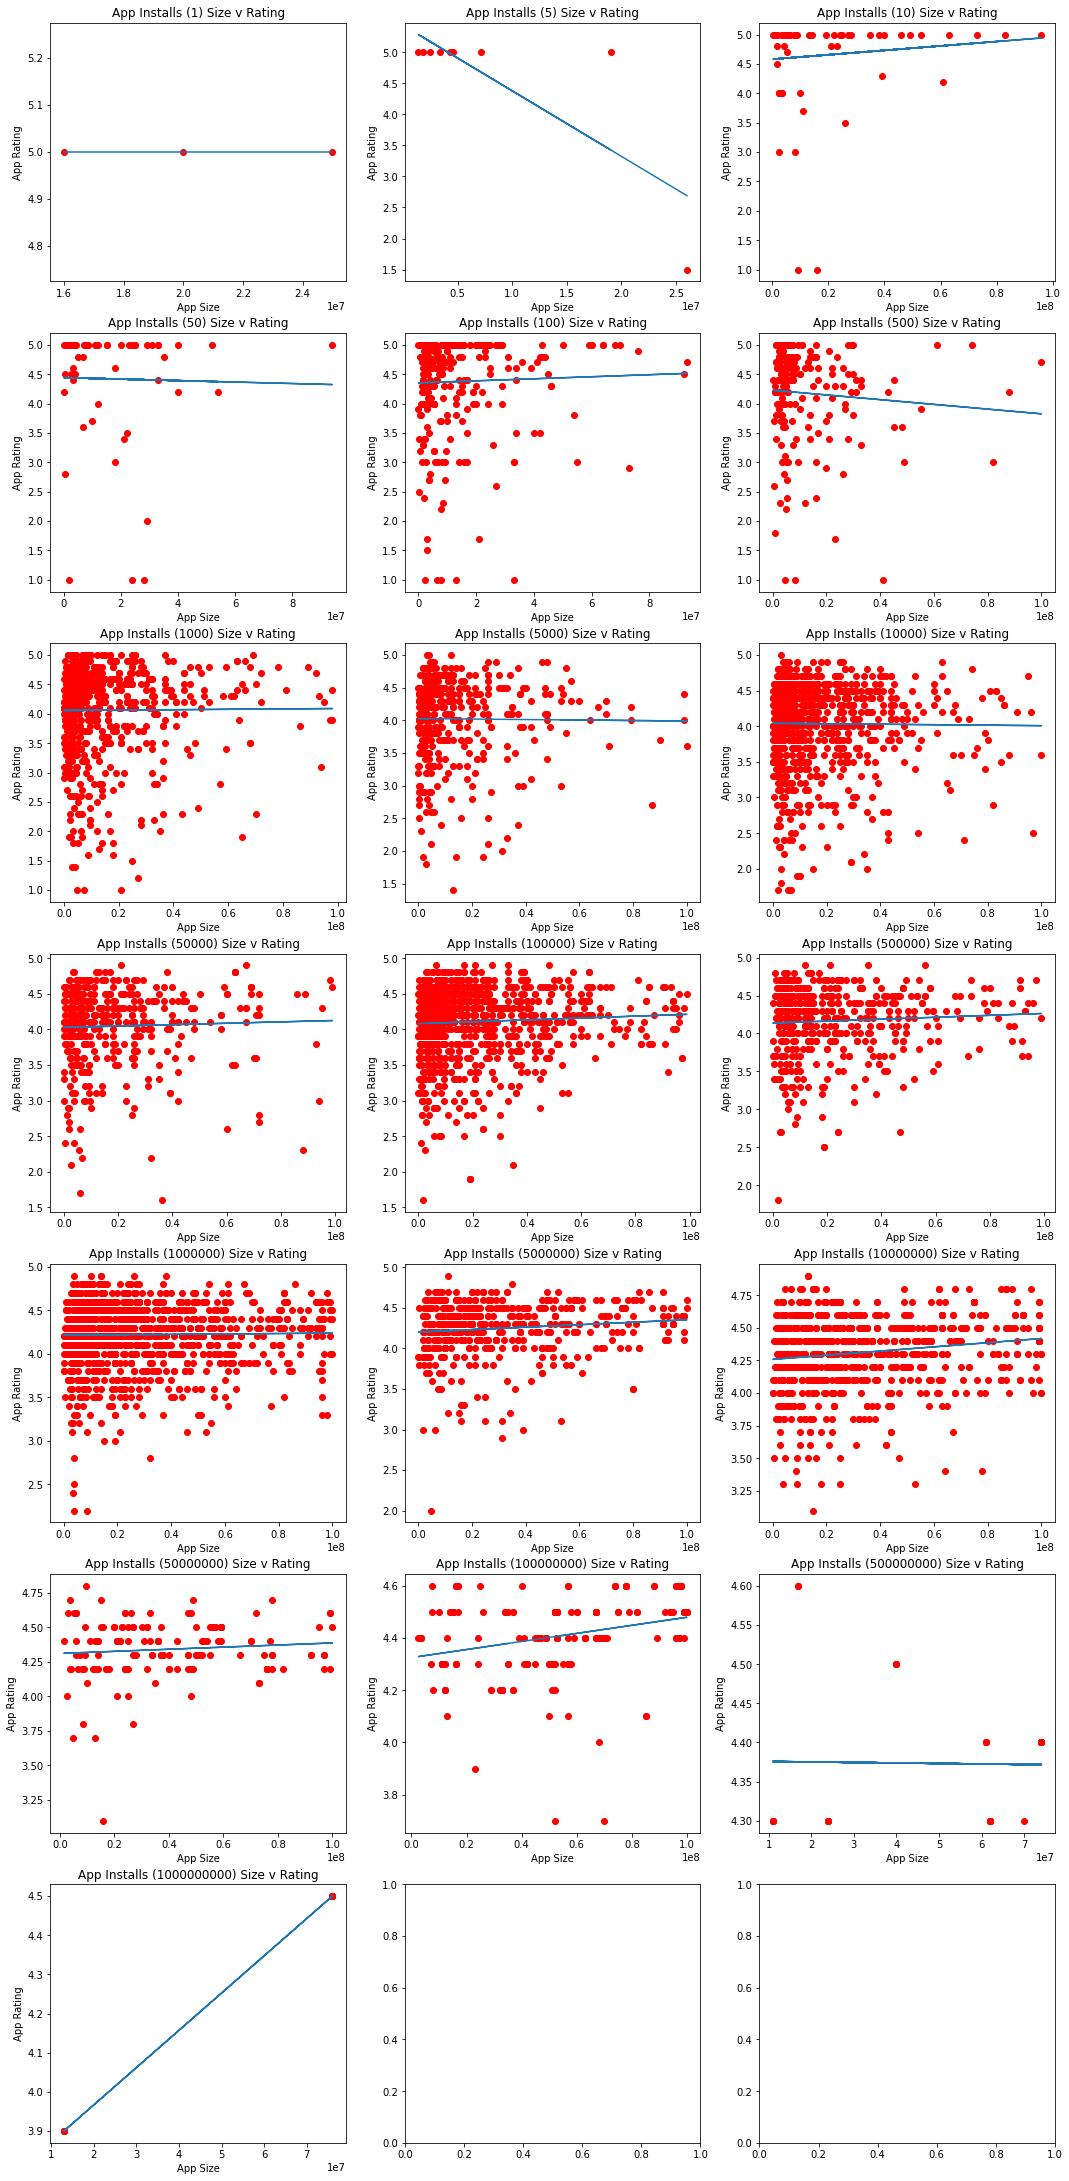

In [19]:
f,ax=plt.subplots(7,3,figsize=(18,39))

ax[0,0].scatter(xinstallA,yinstallA , color = 'red')
ax[0,0].set_title("App Installs (1) Size v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationInstallA = st.pearsonr(xinstallA,yinstallA)
m, b = np.polyfit(xinstallA, yinstallA, 1)
ax[0,0].plot(xinstallA, m*xinstallA + b)
line_eq_InstallA  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallA[0],2)))
print("The linear regression line equation is " + line_eq_InstallA)

ax[0,1].scatter(xinstallB,yinstallB, color = 'red')
ax[0,1].set_title("App Installs (5) Size v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationInstallB = st.pearsonr(xinstallB,yinstallB)
m, b = np.polyfit(xinstallB, yinstallB, 1)
ax[0,1].plot(xinstallB, m*xinstallB + b)
line_eq_InstallB = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallB[0],2)))
print("The linear regression line equation is " + line_eq_InstallB)

ax[0,2].scatter(xinstallC,yinstallC, color = 'red')
ax[0,2].set_title("App Installs (10) Size v Rating")
ax[0,2].set_xlabel("App Size")
ax[0,2].set_ylabel("App Rating")
correlationInstallC = st.pearsonr(xinstallC,yinstallC)
m, b = np.polyfit(xinstallC,yinstallC, 1)
ax[0,2].plot(xinstallC, m*xinstallC + b)
line_eq_InstallC = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallC[0],2)))
print("The linear regression line equation is " + line_eq_InstallC)


ax[1,0].scatter(xinstallD,yinstallD, color = 'red')
ax[1,0].set_title("App Installs (50) Size v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationInstallD = st.pearsonr(xinstallD,yinstallD)
m, b = np.polyfit(xinstallD,yinstallD, 1)
ax[1,0].plot(xinstallD, m*xinstallD + b)
line_eq_InstallD = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallD[0],2)))
print("The linear regression line equation is " + line_eq_InstallD)

ax[1,1].scatter(xinstallE,yinstallE, color = 'red')
ax[1,1].set_title("App Installs (100) Size v Rating")
ax[1,1].set_xlabel("App Size")
ax[1,1].set_ylabel("App Rating")
correlationInstallE = st.pearsonr(xinstallE,yinstallE)
m, b = np.polyfit(xinstallE,yinstallE, 1)
ax[1,1].plot(xinstallE, m*xinstallE + b)
line_eq_InstallE = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallE[0],2)))
print("The linear regression line equation is " + line_eq_InstallE)

ax[1,2].scatter(xinstallF,yinstallF, color = 'red')
ax[1,2].set_title("App Installs (500) Size v Rating")
ax[1,2].set_xlabel("App Size")
ax[1,2].set_ylabel("App Rating")
correlationInstallF = st.pearsonr(xinstallF,yinstallF)
m, b = np.polyfit(xinstallF,yinstallF, 1)
ax[1,2].plot(xinstallF, m*xinstallF + b)
line_eq_InstallF = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallF[0],2)))
print("The linear regression line equation is " + line_eq_InstallF)


ax[2,0].scatter(xinstallG,yinstallG , color = 'red')
ax[2,0].set_title("App Installs (1000) Size v Rating")
ax[2,0].set_xlabel("App Size")
ax[2,0].set_ylabel("App Rating")
correlationInstallG = st.pearsonr(xinstallG,yinstallG)
m, b = np.polyfit(xinstallG, yinstallG, 1)
ax[2,0].plot(xinstallG, m*xinstallG + b)
line_eq_InstallG  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallG[0],2)))
print("The linear regression line equation is " + line_eq_InstallG)

ax[2,1].scatter(xinstallH,yinstallH, color = 'red')
ax[2,1].set_title("App Installs (5000) Size v Rating")
ax[2,1].set_xlabel("App Size")
ax[2,1].set_ylabel("App Rating")
correlationInstallH = st.pearsonr(xinstallH,yinstallH)
m, b = np.polyfit(xinstallH, yinstallH, 1)
ax[2,1].plot(xinstallH, m*xinstallH + b)
line_eq_InstallH = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallH[0],2)))
print("The linear regression line equation is " + line_eq_InstallH)

ax[2,2].scatter(xinstallI,yinstallI, color = 'red')
ax[2,2].set_title("App Installs (10000) Size v Rating")
ax[2,2].set_xlabel("App Size")
ax[2,2].set_ylabel("App Rating")
correlationInstallI = st.pearsonr(xinstallI,yinstallI)
m, b = np.polyfit(xinstallI,yinstallI, 1)
ax[2,2].plot(xinstallI, m*xinstallI + b)
line_eq_InstallI = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallI[0],2)))
print("The linear regression line equation is " + line_eq_InstallI)


ax[3,0].scatter(xinstallJ,yinstallJ, color = 'red')
ax[3,0].set_title("App Installs (50000) Size v Rating")
ax[3,0].set_xlabel("App Size")
ax[3,0].set_ylabel("App Rating")
correlationInstallJ = st.pearsonr(xinstallJ,yinstallJ)
m, b = np.polyfit(xinstallJ,yinstallJ, 1)
ax[3,0].plot(xinstallJ, m*xinstallJ + b)
line_eq_InstallJ = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallJ[0],2)))
print("The linear regression line equation is " + line_eq_InstallJ)

ax[3,1].scatter(xinstallK,yinstallK, color = 'red')
ax[3,1].set_title("App Installs (100000) Size v Rating")
ax[3,1].set_xlabel("App Size")
ax[3,1].set_ylabel("App Rating")
correlationInstallK = st.pearsonr(xinstallK,yinstallK)
m, b = np.polyfit(xinstallK,yinstallK, 1)
ax[3,1].plot(xinstallK, m*xinstallK + b)
line_eq_InstallK = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallK[0],2)))
print("The linear regression line equation is " + line_eq_InstallK)

ax[3,2].scatter(xinstallL,yinstallL, color = 'red')
ax[3,2].set_title("App Installs (500000) Size v Rating")
ax[3,2].set_xlabel("App Size")
ax[3,2].set_ylabel("App Rating")
correlationInstallL = st.pearsonr(xinstallL,yinstallL)
m, b = np.polyfit(xinstallL,yinstallL, 1)
ax[3,2].plot(xinstallL, m*xinstallL + b)
line_eq_InstallL = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallL[0],2)))
print("The linear regression line equation is " + line_eq_InstallL)


ax[4,0].scatter(xinstallM,yinstallM , color = 'red')
ax[4,0].set_title("App Installs (1000000) Size v Rating")
ax[4,0].set_xlabel("App Size")
ax[4,0].set_ylabel("App Rating")
correlationInstallM = st.pearsonr(xinstallM,yinstallM)
m, b = np.polyfit(xinstallM, yinstallM, 1)
ax[4,0].plot(xinstallM, m*xinstallM + b)
line_eq_InstallM  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallM[0],2)))
print("The linear regression line equation is " + line_eq_InstallM)

ax[4,1].scatter(xinstallN,yinstallN, color = 'red')
ax[4,1].set_title("App Installs (5000000) Size v Rating")
ax[4,1].set_xlabel("App Size")
ax[4,1].set_ylabel("App Rating")
correlationInstallN = st.pearsonr(xinstallN,yinstallN)
m, b = np.polyfit(xinstallN, yinstallN, 1)
ax[4,1].plot(xinstallN, m*xinstallN + b)
line_eq_InstallN = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallN[0],2)))
print("The linear regression line equation is " + line_eq_InstallN)

ax[4,2].scatter(xinstallO,yinstallO, color = 'red')
ax[4,2].set_title("App Installs (10000000) Size v Rating")
ax[4,2].set_xlabel("App Size")
ax[4,2].set_ylabel("App Rating")
correlationInstallO = st.pearsonr(xinstallO,yinstallO)
m, b = np.polyfit(xinstallO,yinstallO, 1)
ax[4,2].plot(xinstallO, m*xinstallO + b)
line_eq_InstallO = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallO[0],2)))
print("The linear regression line equation is " + line_eq_InstallO)


ax[5,0].scatter(xinstallP,yinstallP, color = 'red')
ax[5,0].set_title("App Installs (50000000) Size v Rating")
ax[5,0].set_xlabel("App Size")
ax[5,0].set_ylabel("App Rating")
correlationInstallP = st.pearsonr(xinstallP,yinstallP)
m, b = np.polyfit(xinstallP,yinstallP, 1)
ax[5,0].plot(xinstallP, m*xinstallP + b)
line_eq_InstallP = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallP[0],2)))
print("The linear regression line equation is " + line_eq_InstallP)

ax[5,1].scatter(xinstallQ,yinstallQ, color = 'red')
ax[5,1].set_title("App Installs (100000000) Size v Rating")
ax[5,1].set_xlabel("App Size")
ax[5,1].set_ylabel("App Rating")
correlationInstallQ = st.pearsonr(xinstallQ,yinstallQ)
m, b = np.polyfit(xinstallQ,yinstallQ, 1)
ax[5,1].plot(xinstallQ, m*xinstallQ + b)
line_eq_InstallQ = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallQ[0],2)))
print("The linear regression line equation is " + line_eq_InstallQ)

ax[5,2].scatter(xinstallR,yinstallR, color = 'red')
ax[5,2].set_title("App Installs (500000000) Size v Rating")
ax[5,2].set_xlabel("App Size")
ax[5,2].set_ylabel("App Rating")
correlationInstallR = st.pearsonr(xinstallR,yinstallR)
m, b = np.polyfit(xinstallR,yinstallR, 1)
ax[5,2].plot(xinstallR, m*xinstallR + b)
line_eq_InstallR = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallR[0],2)))
print("The linear regression line equation is " + line_eq_InstallR)


ax[6,0].scatter(xinstallS,yinstallS, color = 'red')
ax[6,0].set_title("App Installs (1000000000) Size v Rating")
ax[6,0].set_xlabel("App Size")
ax[6,0].set_ylabel("App Rating")
correlationInstallS = st.pearsonr(xinstallS,yinstallS)
m, b = np.polyfit(xinstallS,yinstallS, 1)
ax[6,0].plot(xinstallS, m*xinstallS + b)
line_eq_InstallS = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallS[0],2)))
print("The linear regression line equation is " + line_eq_InstallS)


<h4>App Reviews v Ratings by Install Tiers (19)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


The correlation coefficient is nan
The linear regression line equation is y = 0.0x + 5.0
The correlation coefficient is 0.16
The linear regression line equation is y = 0.09x + 4.34
The correlation coefficient is 0.1
The linear regression line equation is y = 0.02x + 4.57
The correlation coefficient is 0.29
The linear regression line equation is y = 0.07x + 4.07
The correlation coefficient is 0.16
The linear regression line equation is y = 0.02x + 4.24
The correlation coefficient is 0.17
The linear regression line equation is y = 0.01x + 4.07
The correlation coefficient is 0.17
The linear regression line equation is y = 0.0x + 3.98
The correlation coefficient is 0.2
The linear regression line equation is y = 0.0x + 3.94
The correlation coefficient is 0.22
The linear regression line equation is y = 0.0x + 3.96
The correlation coefficient is 0.34
The linear regression line equation is y = 0.0x + 3.91
The correlation coefficient is 0.3
The linear regression line equation is y = 0.0x + 4.01

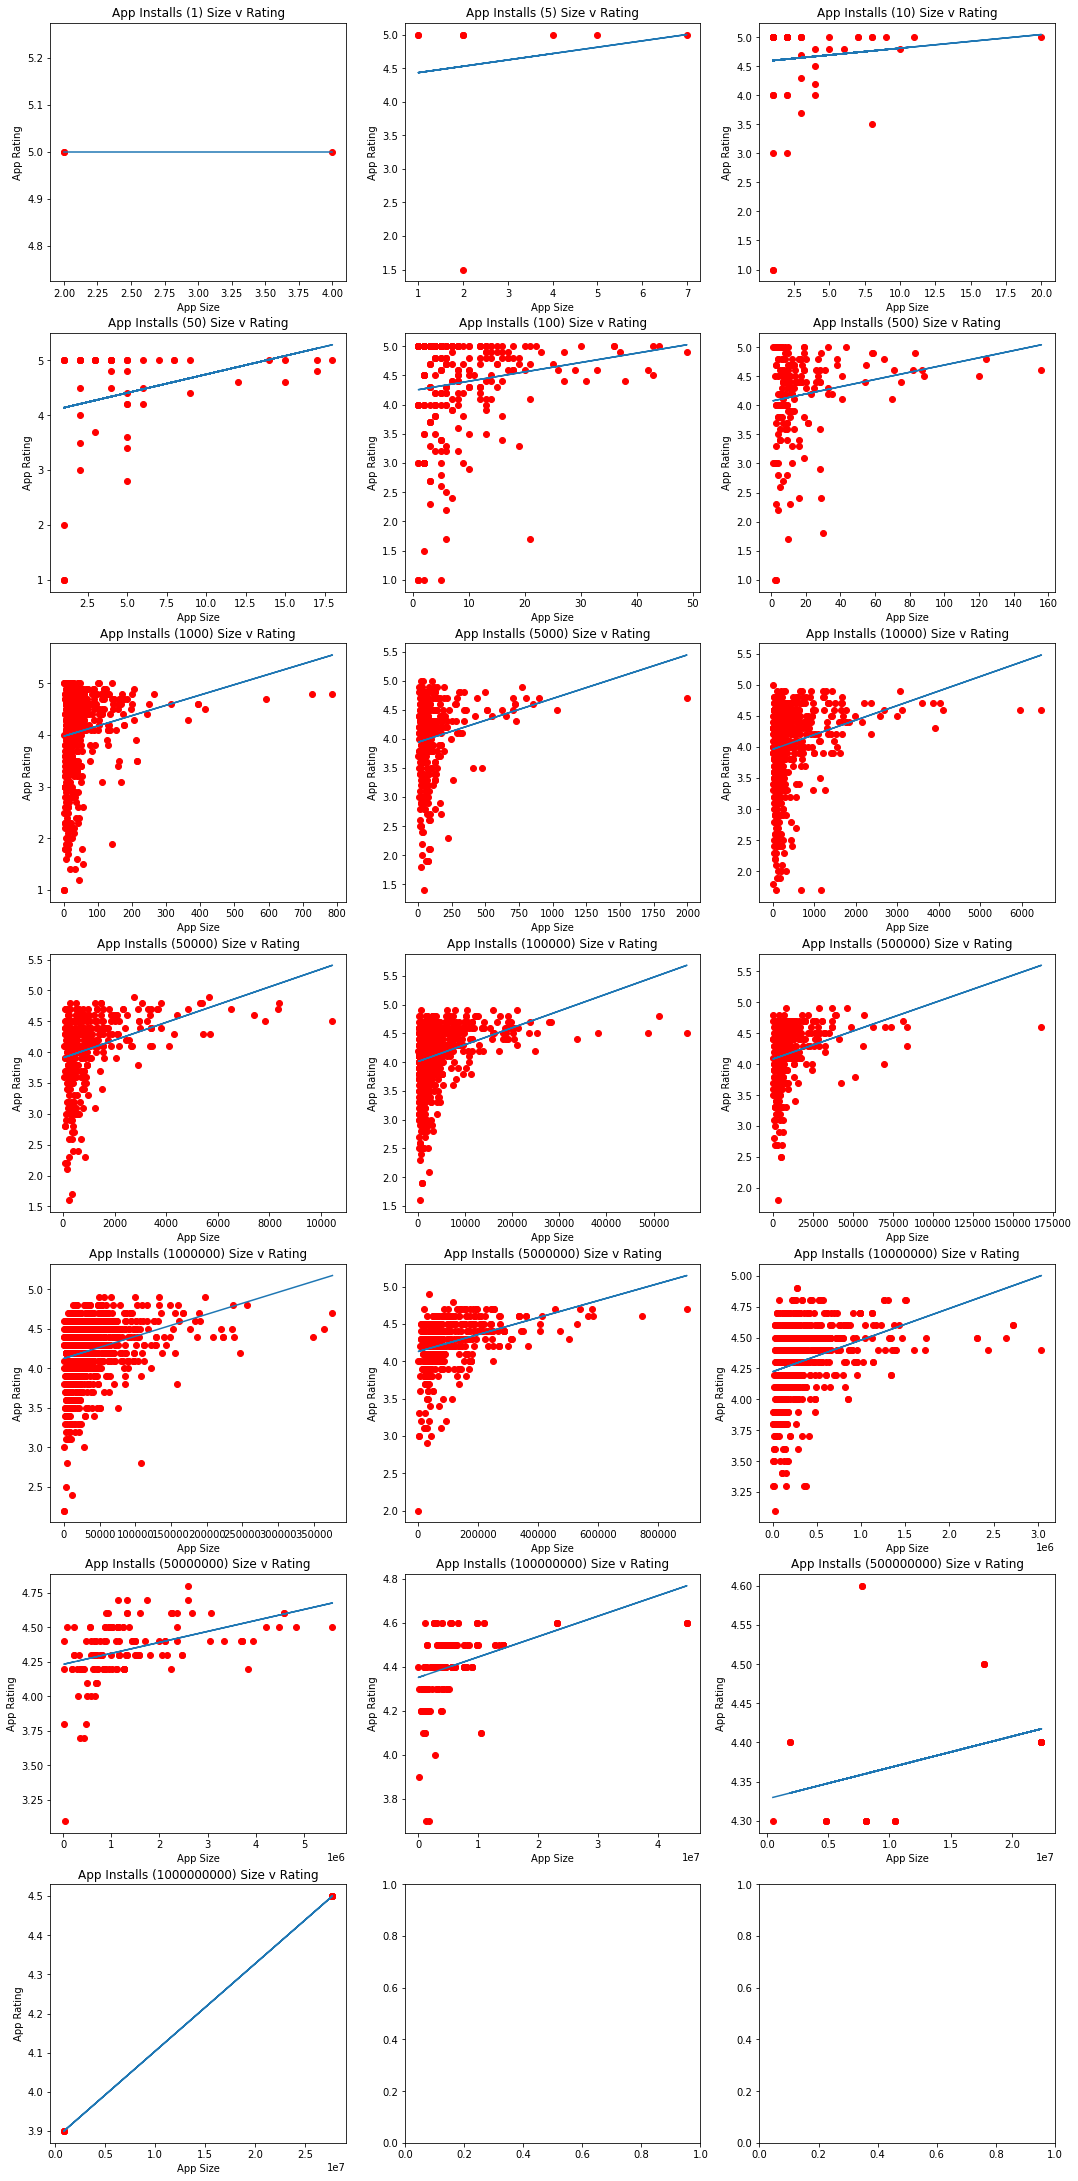

In [20]:
f,ax=plt.subplots(7,3,figsize=(18,39))

ax[0,0].scatter(xinstallARev,yinstallA , color = 'red')
ax[0,0].set_title("App Installs (1) Size v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationInstallARev = st.pearsonr(xinstallARev,yinstallA)
m, b = np.polyfit(xinstallARev, yinstallA, 1)
ax[0,0].plot(xinstallARev, m*xinstallARev + b)
line_eq_InstallARev  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallARev[0],2)))
print("The linear regression line equation is " + line_eq_InstallARev)

ax[0,1].scatter(xinstallBRev,yinstallB, color = 'red')
ax[0,1].set_title("App Installs (5) Size v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationInstallBRev = st.pearsonr(xinstallBRev,yinstallB)
m, b = np.polyfit(xinstallBRev, yinstallB, 1)
ax[0,1].plot(xinstallBRev, m*xinstallBRev + b)
line_eq_InstallBRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallBRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallBRev)

ax[0,2].scatter(xinstallCRev,yinstallC, color = 'red')
ax[0,2].set_title("App Installs (10) Size v Rating")
ax[0,2].set_xlabel("App Size")
ax[0,2].set_ylabel("App Rating")
correlationInstallCRev = st.pearsonr(xinstallCRev,yinstallC)
m, b = np.polyfit(xinstallCRev,yinstallC, 1)
ax[0,2].plot(xinstallCRev, m*xinstallCRev + b)
line_eq_InstallCRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallCRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallCRev)


ax[1,0].scatter(xinstallDRev,yinstallD, color = 'red')
ax[1,0].set_title("App Installs (50) Size v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationInstallDRev = st.pearsonr(xinstallDRev,yinstallD)
m, b = np.polyfit(xinstallDRev,yinstallD, 1)
ax[1,0].plot(xinstallDRev, m*xinstallDRev + b)
line_eq_InstallDRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallDRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallDRev)

ax[1,1].scatter(xinstallERev,yinstallE, color = 'red')
ax[1,1].set_title("App Installs (100) Size v Rating")
ax[1,1].set_xlabel("App Size")
ax[1,1].set_ylabel("App Rating")
correlationInstallERev = st.pearsonr(xinstallERev,yinstallE)
m, b = np.polyfit(xinstallERev,yinstallE, 1)
ax[1,1].plot(xinstallERev, m*xinstallERev + b)
line_eq_InstallERev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallERev[0],2)))
print("The linear regression line equation is " + line_eq_InstallERev)

ax[1,2].scatter(xinstallFRev,yinstallF, color = 'red')
ax[1,2].set_title("App Installs (500) Size v Rating")
ax[1,2].set_xlabel("App Size")
ax[1,2].set_ylabel("App Rating")
correlationInstallFRev = st.pearsonr(xinstallFRev,yinstallF)
m, b = np.polyfit(xinstallFRev,yinstallF, 1)
ax[1,2].plot(xinstallFRev, m*xinstallFRev + b)
line_eq_InstallFRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallFRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallFRev)


ax[2,0].scatter(xinstallGRev,yinstallG , color = 'red')
ax[2,0].set_title("App Installs (1000) Size v Rating")
ax[2,0].set_xlabel("App Size")
ax[2,0].set_ylabel("App Rating")
correlationInstallGRev = st.pearsonr(xinstallGRev,yinstallG)
m, b = np.polyfit(xinstallGRev, yinstallG, 1)
ax[2,0].plot(xinstallGRev, m*xinstallGRev + b)
line_eq_InstallGRev  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallGRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallGRev)

ax[2,1].scatter(xinstallHRev,yinstallH, color = 'red')
ax[2,1].set_title("App Installs (5000) Size v Rating")
ax[2,1].set_xlabel("App Size")
ax[2,1].set_ylabel("App Rating")
correlationInstallHRev = st.pearsonr(xinstallHRev,yinstallH)
m, b = np.polyfit(xinstallHRev, yinstallH, 1)
ax[2,1].plot(xinstallHRev, m*xinstallHRev + b)
line_eq_InstallHRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallHRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallHRev)

ax[2,2].scatter(xinstallIRev,yinstallI, color = 'red')
ax[2,2].set_title("App Installs (10000) Size v Rating")
ax[2,2].set_xlabel("App Size")
ax[2,2].set_ylabel("App Rating")
correlationInstallIRev = st.pearsonr(xinstallIRev,yinstallI)
m, b = np.polyfit(xinstallIRev,yinstallI, 1)
ax[2,2].plot(xinstallIRev, m*xinstallIRev + b)
line_eq_InstallIRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallIRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallIRev)


ax[3,0].scatter(xinstallJRev,yinstallJ, color = 'red')
ax[3,0].set_title("App Installs (50000) Size v Rating")
ax[3,0].set_xlabel("App Size")
ax[3,0].set_ylabel("App Rating")
correlationInstallJRev = st.pearsonr(xinstallJRev,yinstallJ)
m, b = np.polyfit(xinstallJRev,yinstallJ, 1)
ax[3,0].plot(xinstallJRev, m*xinstallJRev + b)
line_eq_InstallJRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallJRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallJRev)

ax[3,1].scatter(xinstallKRev,yinstallK, color = 'red')
ax[3,1].set_title("App Installs (100000) Size v Rating")
ax[3,1].set_xlabel("App Size")
ax[3,1].set_ylabel("App Rating")
correlationInstallKRev = st.pearsonr(xinstallKRev,yinstallK)
m, b = np.polyfit(xinstallKRev,yinstallK, 1)
ax[3,1].plot(xinstallKRev, m*xinstallKRev + b)
line_eq_InstallKRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallKRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallKRev)

ax[3,2].scatter(xinstallLRev,yinstallL, color = 'red')
ax[3,2].set_title("App Installs (500000) Size v Rating")
ax[3,2].set_xlabel("App Size")
ax[3,2].set_ylabel("App Rating")
correlationInstallLRev = st.pearsonr(xinstallLRev,yinstallL)
m, b = np.polyfit(xinstallLRev,yinstallL, 1)
ax[3,2].plot(xinstallLRev, m*xinstallLRev + b)
line_eq_InstallLRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallLRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallLRev)


ax[4,0].scatter(xinstallMRev,yinstallM , color = 'red')
ax[4,0].set_title("App Installs (1000000) Size v Rating")
ax[4,0].set_xlabel("App Size")
ax[4,0].set_ylabel("App Rating")
correlationInstallMRev = st.pearsonr(xinstallMRev,yinstallM)
m, b = np.polyfit(xinstallMRev, yinstallM, 1)
ax[4,0].plot(xinstallMRev, m*xinstallMRev + b)
line_eq_InstallMRev  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallMRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallMRev)

ax[4,1].scatter(xinstallNRev,yinstallN, color = 'red')
ax[4,1].set_title("App Installs (5000000) Size v Rating")
ax[4,1].set_xlabel("App Size")
ax[4,1].set_ylabel("App Rating")
correlationInstallNRev = st.pearsonr(xinstallNRev,yinstallN)
m, b = np.polyfit(xinstallNRev, yinstallN, 1)
ax[4,1].plot(xinstallNRev, m*xinstallNRev + b)
line_eq_InstallNRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallNRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallNRev)

ax[4,2].scatter(xinstallORev,yinstallO, color = 'red')
ax[4,2].set_title("App Installs (10000000) Size v Rating")
ax[4,2].set_xlabel("App Size")
ax[4,2].set_ylabel("App Rating")
correlationInstallORev = st.pearsonr(xinstallORev,yinstallO)
m, b = np.polyfit(xinstallORev,yinstallO, 1)
ax[4,2].plot(xinstallORev, m*xinstallORev + b)
line_eq_InstallORev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallORev[0],2)))
print("The linear regression line equation is " + line_eq_InstallORev)


ax[5,0].scatter(xinstallPRev,yinstallP, color = 'red')
ax[5,0].set_title("App Installs (50000000) Size v Rating")
ax[5,0].set_xlabel("App Size")
ax[5,0].set_ylabel("App Rating")
correlationInstallPRev = st.pearsonr(xinstallPRev,yinstallP)
m, b = np.polyfit(xinstallPRev,yinstallP, 1)
ax[5,0].plot(xinstallPRev, m*xinstallPRev + b)
line_eq_InstallPRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallPRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallPRev)

ax[5,1].scatter(xinstallQRev,yinstallQ, color = 'red')
ax[5,1].set_title("App Installs (100000000) Size v Rating")
ax[5,1].set_xlabel("App Size")
ax[5,1].set_ylabel("App Rating")
correlationInstallQRev = st.pearsonr(xinstallQRev,yinstallQ)
m, b = np.polyfit(xinstallQRev,yinstallQ, 1)
ax[5,1].plot(xinstallQRev, m*xinstallQRev + b)
line_eq_InstallQRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallQRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallQRev)

ax[5,2].scatter(xinstallRRev,yinstallR, color = 'red')
ax[5,2].set_title("App Installs (500000000) Size v Rating")
ax[5,2].set_xlabel("App Size")
ax[5,2].set_ylabel("App Rating")
correlationInstallRRev = st.pearsonr(xinstallRRev,yinstallR)
m, b = np.polyfit(xinstallRRev,yinstallR, 1)
ax[5,2].plot(xinstallRRev, m*xinstallRRev + b)
line_eq_InstallRRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallRRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallRRev)


ax[6,0].scatter(xinstallSRev,yinstallS, color = 'red')
ax[6,0].set_title("App Installs (1000000000) Size v Rating")
ax[6,0].set_xlabel("App Size")
ax[6,0].set_ylabel("App Rating")
correlationInstallSRev = st.pearsonr(xinstallSRev,yinstallS)
m, b = np.polyfit(xinstallSRev,yinstallS, 1)
ax[6,0].plot(xinstallSRev, m*xinstallSRev + b)
line_eq_InstallSRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationInstallSRev[0],2)))
print("The linear regression line equation is " + line_eq_InstallSRev)


<h3>Type (2)

In [13]:
typeA = base_model.loc[base_model["Type"]=="Free"]
xtypeA= typeA.Size
xtypeARev = typeA.Reviews
xtypeAIns = typeA.Installs
ytypeA = typeA.Rating

typeB = base_model.loc[base_model["Type"]=="Paid"]
xtypeB = typeB.Size
xtypeBRev = typeB.Reviews
xtypeBIns = typeB.Installs
ytypeB = typeB.Rating

<h4>App Size v Rating by Type

The correlation coefficient is 0.08
The linear regression line equation is y = 0.0x + 4.12
The correlation coefficient is 0.12
The linear regression line equation is y = 0.0x + 4.19


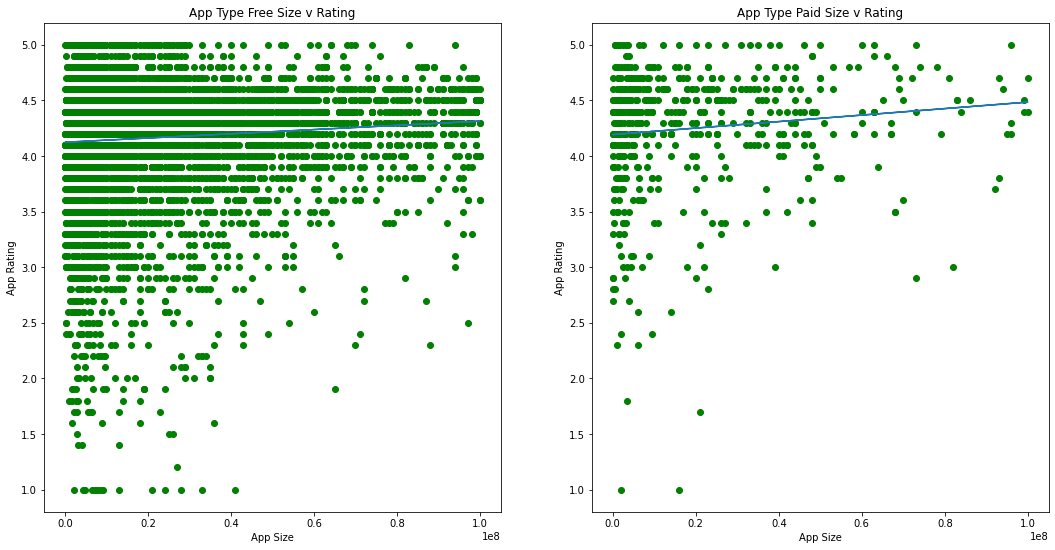

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,9))

ax[0].scatter(xtypeA,ytypeA , color = 'green')
ax[0].set_title("App Type Free Size v Rating")
ax[0].set_xlabel("App Size")
ax[0].set_ylabel("App Rating")
correlationTypeA = st.pearsonr(xtypeA,ytypeA)
m, b = np.polyfit(xtypeA, ytypeA, 1)
ax[0].plot(xtypeA, m*xtypeA + b)
line_eq_TypeA  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationTypeA[0],2)))
print("The linear regression line equation is " + line_eq_TypeA)

ax[1].scatter(xtypeB,ytypeB, color = 'green')
ax[1].set_title("App Type Paid Size v Rating")
ax[1].set_xlabel("App Size")
ax[1].set_ylabel("App Rating")
correlationTypeB = st.pearsonr(xtypeB,ytypeB)
m, b = np.polyfit(xtypeB, ytypeB, 1)
ax[1].plot(xtypeB, m*xtypeB + b)
line_eq_TypeB = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationTypeB[0],2)))
print("The linear regression line equation is " + line_eq_TypeB)

<h4>App Reviews v Rating by Type

The correlation coefficient is 0.09
The linear regression line equation is y = 0.0x + 4.16
The correlation coefficient is 0.1
The linear regression line equation is y = 0.0x + 4.24


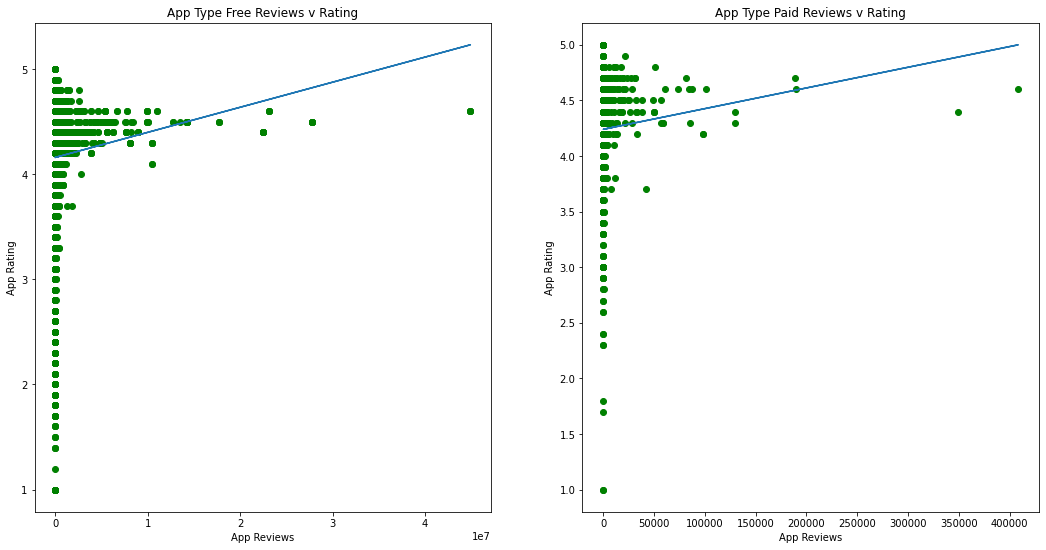

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,9))

ax[0].scatter(xtypeARev,ytypeA , color = 'green')
ax[0].set_title("App Type Free Reviews v Rating")
ax[0].set_xlabel("App Reviews")
ax[0].set_ylabel("App Rating")
correlationTypeARev = st.pearsonr(xtypeARev,ytypeA)
m, b = np.polyfit(xtypeARev, ytypeA, 1)
ax[0].plot(xtypeARev, m*xtypeARev + b)
line_eq_TypeARev  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationTypeARev[0],2)))
print("The linear regression line equation is " + line_eq_TypeARev)

ax[1].scatter(xtypeBRev,ytypeB, color = 'green')
ax[1].set_title("App Type Paid Reviews v Rating")
ax[1].set_xlabel("App Reviews")
ax[1].set_ylabel("App Rating")
correlationTypeBRev = st.pearsonr(xtypeBRev,ytypeB)
m, b = np.polyfit(xtypeBRev, ytypeB, 1)
ax[1].plot(xtypeBRev, m*xtypeBRev + b)
line_eq_TypeBRev = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationTypeBRev[0],2)))
print("The linear regression line equation is " + line_eq_TypeBRev)

<h4>App Installs v Rating by Type

The correlation coefficient is 0.06
The linear regression line equation is y = 0.0x + 4.16
The correlation coefficient is 0.06
The linear regression line equation is y = 0.0x + 4.25


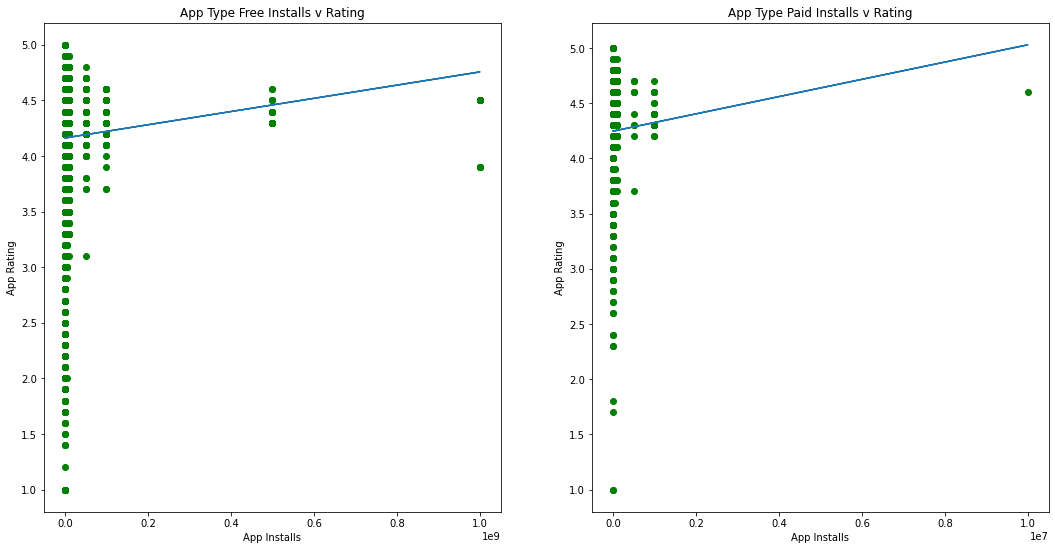

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,9))

ax[0].scatter(xtypeAIns,ytypeA , color = 'green')
ax[0].set_title("App Type Free Installs v Rating")
ax[0].set_xlabel("App Installs")
ax[0].set_ylabel("App Rating")
correlationTypeAIns = st.pearsonr(xtypeAIns,ytypeA)
m, b = np.polyfit(xtypeAIns, ytypeA, 1)
ax[0].plot(xtypeAIns, m*xtypeAIns + b)
line_eq_TypeAIns  = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationTypeAIns[0],2)))
print("The linear regression line equation is " + line_eq_TypeAIns)

ax[1].scatter(xtypeBIns,ytypeB, color = 'green')
ax[1].set_title("App Type Paid Installs v Rating")
ax[1].set_xlabel("App Installs")
ax[1].set_ylabel("App Rating")
correlationTypeBIns = st.pearsonr(xtypeBIns,ytypeB)
m, b = np.polyfit(xtypeBIns, ytypeB, 1)
ax[1].plot(xtypeBIns, m*xtypeBIns + b)
line_eq_TypeBIns = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationTypeBIns[0],2)))
print("The linear regression line equation is " + line_eq_TypeBIns)

<h3>Content Rating (4)

In [17]:
crA = base_model.loc[base_model["Content Rating"]=="Everyone"]
xcrA= crA.Size
xcrARev = crA.Reviews
xcrAIns = crA.Installs
ycrA = crA.Rating

crB = base_model.loc[base_model["Content Rating"]=="Teen"]
xcrB= crB.Size
xcrBRev = crB.Reviews
xcrBIns = crB.Installs
ycrB = crB.Rating

crC = base_model.loc[base_model["Content Rating"]=="Mature 17+"]
xcrC= crC.Size
xcrCRev = crC.Reviews
xcrCIns = crC.Installs
ycrC = crC.Rating

crD = base_model.loc[base_model["Content Rating"]=="Mature 17+"]
xcrD = crD.Size
xcrDRev = crD.Reviews
xcrDIns = crD.Installs
ycrD = crD.Rating


crE = base_model.loc[base_model["Content Rating"]=="Adults only 18+"] # 2 VALUES
crF = base_model.loc[base_model["Content Rating"]=="Unrated"] #1 VALUE

<h4>App Installs v Rating by Content Rating

The correlation coefficient is 0.07
The linear regression line equation is y = 0.0x + 4.13
The correlation coefficient is 0.1
The linear regression line equation is y = 0.0x + 4.18
The correlation coefficient is 0.13
The linear regression line equation is y = 0.0x + 4.02
The correlation coefficient is 0.13
The linear regression line equation is y = 0.0x + 4.02


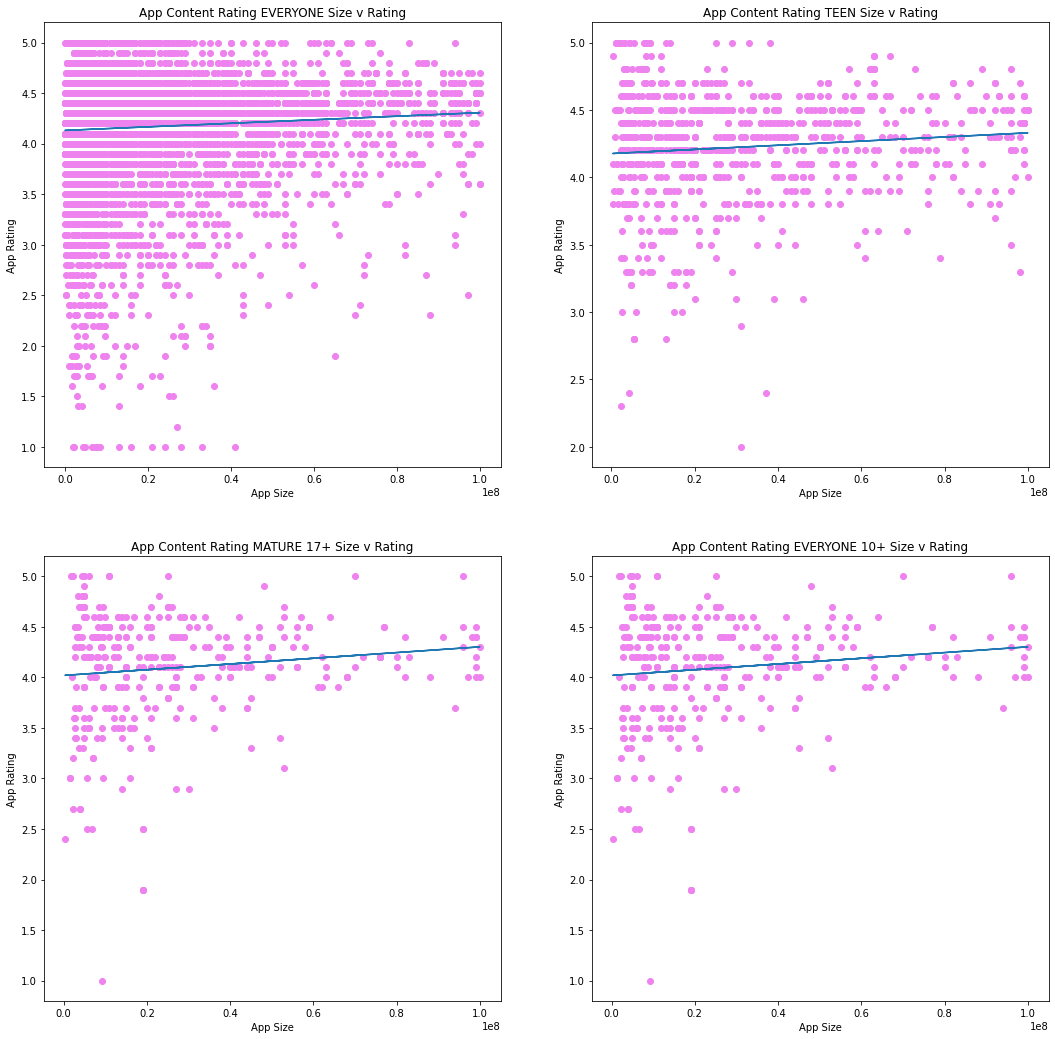

In [18]:
f,ax=plt.subplots(2,2,figsize=(18,18))

ax[0,0].scatter(xcrA,ycrA, color = 'violet')
ax[0,0].set_title("App Content Rating EVERYONE Size v Rating")
ax[0,0].set_xlabel("App Size")
ax[0,0].set_ylabel("App Rating")
correlationCRA = st.pearsonr(xcrA,ycrA)
m, b = np.polyfit(xcrA,ycrA, 1)
ax[0,0].plot(xcrA, m*xcrA + b)
line_eq_CRA = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationCRA[0],2)))
print("The linear regression line equation is " + line_eq_CRA)

ax[0,1].scatter(xcrB,ycrB, color = 'violet')
ax[0,1].set_title("App Content Rating TEEN Size v Rating")
ax[0,1].set_xlabel("App Size")
ax[0,1].set_ylabel("App Rating")
correlationCRB = st.pearsonr(xcrB,ycrB)
m, b = np.polyfit(xcrB,ycrB, 1)
ax[0,1].plot(xcrB, m*xcrB + b)
line_eq_CRB = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationCRB[0],2)))
print("The linear regression line equation is " + line_eq_CRB)

ax[1,0].scatter(xcrC,ycrC, color = 'violet')
ax[1,0].set_title("App Content Rating MATURE 17+ Size v Rating")
ax[1,0].set_xlabel("App Size")
ax[1,0].set_ylabel("App Rating")
correlationCRC = st.pearsonr(xcrC,ycrC)
m, b = np.polyfit(xcrC,ycrC, 1)
ax[1,0].plot(xcrC, m*xcrC + b)
line_eq_CRC = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationCRC[0],2)))
print("The linear regression line equation is " + line_eq_CRC)

ax[1,1].scatter(xcrD,ycrD, color = 'violet')
ax[1,1].set_title("App Content Rating EVERYONE 10+ Size v Rating")
ax[1,1].set_xlabel("App Size")
ax[1,1].set_ylabel("App Rating")
correlationCRD = st.pearsonr(xcrD,ycrD)
m, b = np.polyfit(xcrD,ycrD, 1)
ax[1,1].plot(xcrD, m*xcrD + b)
line_eq_CRD = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
print("The correlation coefficient is " + str(round(correlationCRD[0],2)))
print("The linear regression line equation is " + line_eq_CRD)
